# Synthesis of all algorithms


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

## a synthesis



In [3]:
%%writefile data_cache/synthesis.py

metatag = 'synthesis_WE_'
metatag = 'synthesis_3_'
metatag = 'synthesis_2_'

for variable in ['eta', 'alpha_homeo', 'eta_homeo', 'l0_sparseness']:
    from shl_scripts.shl_experiments import SHL_set
    verbose = 0
    default = dict(eta=.002, beta1=.9, beta2=.999, epsilon=1.e-8, verbose=verbose)

    opts = {}
    opts['nohomeo'] = dict(homeo_method='None')
    opts['EMP'] = dict(homeo_method='EMP', eta_homeo=0.01, alpha_homeo=0.1)
    opts['EXP'] = dict(homeo_method='EXP', eta_homeo=0.01, alpha_homeo=0.1)
    opts['HAP'] = dict(homeo_method='HAP', eta_homeo=0.01, alpha_homeo=0.1)
    opts['HEH'] = dict(homeo_method='HEH', eta_homeo=0.05, C=5., nb_quant=128, P_cum=None)

    display_variables = ['error', 'qerror', 'aerror', 'cputime']
    for display_variable in display_variables:
        fig, ax = None, None

        for tag in opts.keys():
            opts[tag].update(default)
            experiments = SHL_set(opts[tag], tag=metatag + tag)
            fig, ax = experiments.scan(variable=variable, list_figures=[], display='final', fig=fig, ax=ax, label=tag, display_variable=display_variable)

        ax.legend()

Overwriting data_cache/synthesis.py


In [4]:
%run data_cache/synthesis.py

AttributeError: 'NoneType' object has no attribute 'shape'

## CPU time as a function of the number of dictionary elements



IndexError: index 1000 is out of bounds for axis 0 with size 1000

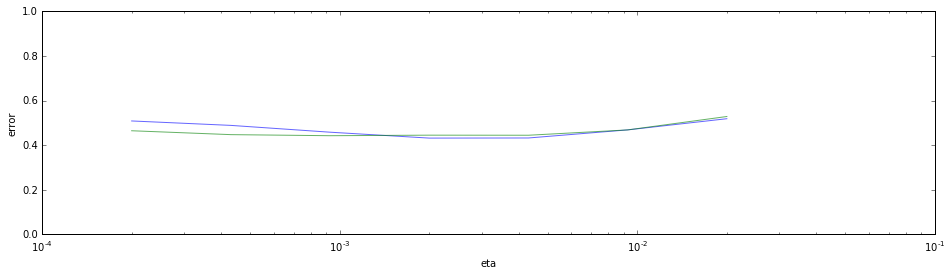

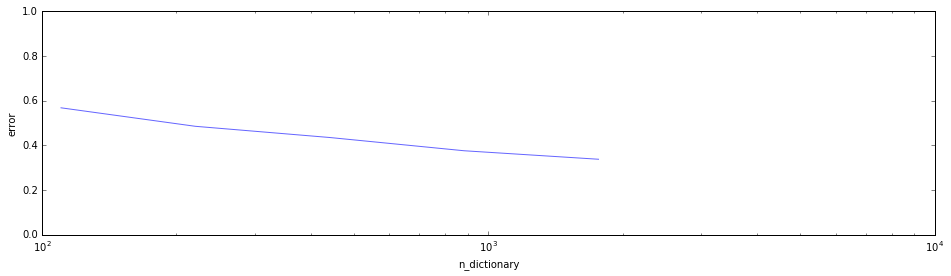

In [5]:
for display_variable in display_variables:
    fig, ax = None, None

    for tag in opts.keys():
        opts[tag].update(default)
        experiments = SHL_set(opts[tag], tag='synthesis_' + tag)
        fig, ax = experiments.scan(list_figures=[], base=4, N_scan=5, variable='n_dictionary', display='final', fig=fig, ax=ax, label=tag, display_variable=display_variable)
    ax.legend()    

In [ ]:

for display_variable in display_variables:
    fig, ax = None, None

    for tag in opts.keys():
        opts[tag].update(default)
        experiments = SHL_set(opts[tag], tag='synthesis_' + tag)
        fig, ax = experiments.scan(list_figures=[], base=4, N_scan=5, variable='l0_sparseness', display='final', fig=fig, ax=ax, label=tag, display_variable=display_variable)
    ax.legend()    
    
    


tester:
- l0 sparseness avec MP et OMP

## Version used

In [ ]:
%load_ext version_information
%version_information numpy, shl_scripts, pandas